## Preprocessing

### Setup & Imports

In [8]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Settings
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)


### Load Dataset

In [9]:
# Load raw dataset
data = pd.read_csv("../../data/raw/dataset.csv")

# Inspect the dataset
data.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [11]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,7.819168,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,4.856692,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,10.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,46.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


### Handle Missing Values

In [12]:
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

### Detect & Handle Outliers

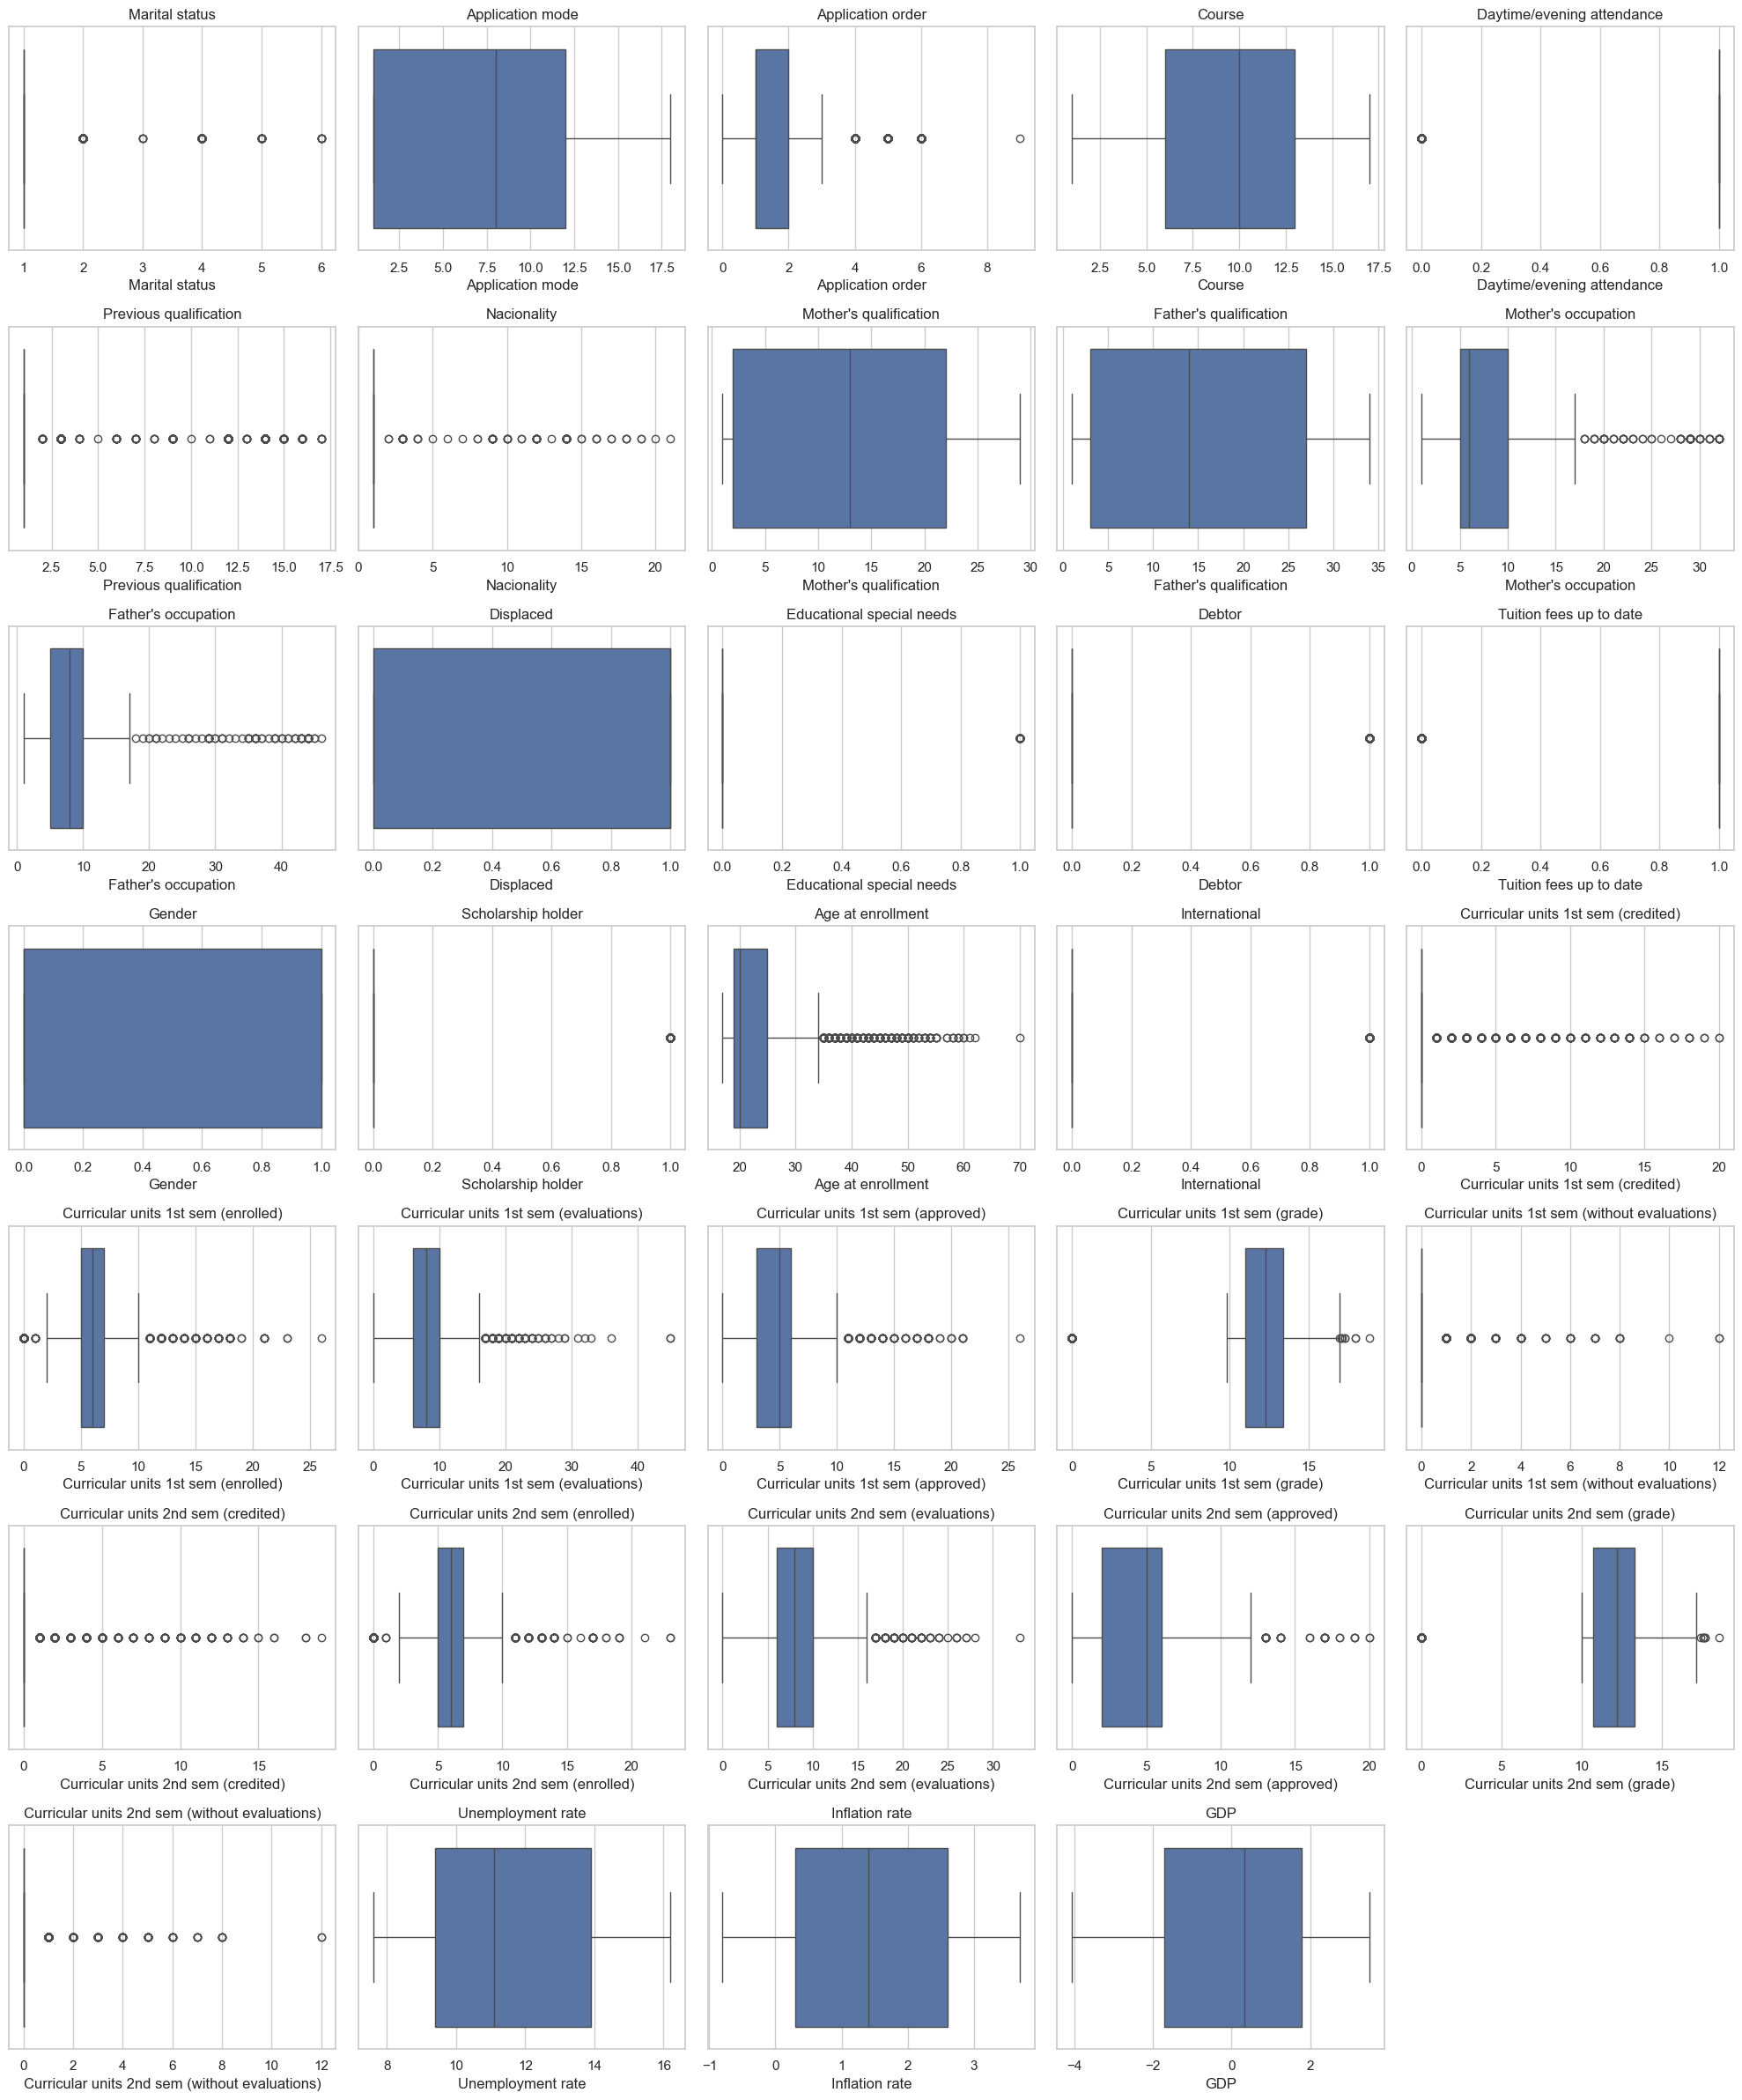

In [13]:
# Boxplots for numerical columns
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(20, 24))  # Increase figure size for more plots
rows = 7
cols = 5  # 7*5 = 35 > 31, enough for all columns

for i, col in enumerate(numerical_cols):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(x=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Feature Engineering

In [14]:
data['Total_credits'] = data['Curricular units 1st sem (credited)'] + data['Curricular units 2nd sem (credited)']
data['GPA_ratio'] = data['Curricular units 1st sem (approved)'] / data['Curricular units 1st sem (enrolled)']

In [15]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [16]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Total_credits,GPA_ratio
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0,NaN
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,0,1.000000
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0,0.000000
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,0,1.000000
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,0,0.833333


In [24]:
data.isnull().sum().sort_values(ascending=False)

Marital status                                    0
Curricular units 1st sem (credited)               0
Curricular units 1st sem (evaluations)            0
Curricular units 1st sem (approved)               0
Curricular units 1st sem (grade)                  0
Curricular units 1st sem (without evaluations)    0
Curricular units 2nd sem (credited)               0
Curricular units 2nd sem (enrolled)               0
Curricular units 2nd sem (evaluations)            0
Curricular units 2nd sem (approved)               0
Curricular units 2nd sem (grade)                  0
Curricular units 2nd sem (without evaluations)    0
Unemployment rate                                 0
Inflation rate                                    0
GDP                                               0
Target                                            0
Total_credits                                     0
Curricular units 1st sem (enrolled)               0
International                                     0
Application 

In [23]:
data['GPA_ratio'].fillna(data['GPA_ratio'].mean(), inplace=True)

C:\Users\SAYAN\AppData\Local\Temp\ipykernel_14160\2608869136.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['GPA_ratio'].fillna(data['GPA_ratio'].mean(), inplace=True)


### Scale Numerical Features

In [25]:
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

### LabelEncoder

In [35]:
le = LabelEncoder()
data['Target'] = le.fit_transform(data['Target'])
data['Target']

0       0
1       2
2       0
3       2
4       2
       ..
4419    2
4420    0
4421    0
4422    2
4423    2
Name: Target, Length: 4424, dtype: int64

In [36]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Total_credits,GPA_ratio
0,-0.294829,0.210069,2.490896,-1.823744,0.350082,-0.386404,-0.145586,0.075111,-0.584526,-0.329669,0.449087,0.907512,-0.107993,-0.358167,0.368135,1.357640,-0.574914,-0.430363,-0.159682,-0.300813,-2.528560,-1.986068,-1.521257,-2.197102,-0.199273,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,0,0,0.857143
1,-0.294829,-0.167406,-0.554068,0.254153,0.350082,-0.386404,-0.145586,-1.254495,-1.218380,-0.829997,-0.786461,0.907512,-0.107993,-0.358167,-2.716392,1.357640,-0.574914,-0.562168,-0.159682,-0.300813,-0.109105,-0.550192,0.418050,0.693599,-0.199273,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199,2,0,1.000000
2,-0.294829,-1.111094,2.490896,-1.131112,0.350082,-0.386404,-0.145586,1.072315,0.954834,0.670987,0.449087,0.907512,-0.107993,-0.358167,-2.716392,1.357640,-0.574914,-0.562168,-0.159682,-0.300813,-0.109105,-1.986068,-1.521257,-2.197102,-0.199273,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,0,0,0.000000
3,-0.294829,0.210069,0.207173,1.177663,0.350082,-0.386404,-0.145586,1.183116,0.954834,-0.329669,-0.786461,0.907512,-0.107993,-0.358167,0.368135,-0.736572,-0.574914,-0.430363,-0.159682,-0.300813,-0.109105,-0.071567,0.418050,0.575611,-0.199273,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511,2,0,1.000000
4,1.356212,0.965018,-0.554068,-1.592866,-2.856470,-0.386404,-0.145586,1.072315,1.045384,0.670987,0.449087,-1.101914,-0.107993,-0.358167,0.368135,-0.736572,-0.574914,2.864765,-0.159682,-0.300813,-0.109105,0.167746,0.094832,0.349468,-0.199273,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199,2,0,0.833333


### Data Split

In [37]:
X = data.drop('Target', axis=1)
y = data['Target']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)


In [38]:
# Save processed data
X_train.to_csv("../../data/processed/X_train.csv", index=False)
y_train.to_csv("../../data/processed/y_train.csv", index=False)
X_val.to_csv("../../data/processed/X_val.csv", index=False)
y_val.to_csv("../../data/processed/y_val.csv", index=False)
X_test.to_csv("../../data/processed/X_test.csv", index=False)
y_test.to_csv("../../data/processed/y_test.csv", index=False)
